In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import AffinityPropagation
import glob
from pattern.nl import parse, split
from collections import Counter
from gensim.models import KeyedVectors

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
os.chdir('D:/Rampen/ngrams')
l = sorted(glob.glob('*bigrams.csv'))

In [24]:
df = pd.DataFrame()
for i in range(1780,1850):
    
    d = pd.read_csv(str(i) + "-trigrams.csv")
        
    d = d[(d['gram'].str.contains('rampen_des_')) | (d['gram'].str.contains('rampen_der_'))]
    d['year'] = str(i)
    df = df.append(d)

In [25]:
df['year'] = df['year'].astype(int) // 10 * 10

In [26]:
df = df.groupby(['gram','year']).sum().reset_index().pivot(columns='year',index='gram',values='count').reset_index()

In [29]:
df.sort_values(df.columns[2],ascending=False)

year,gram,1790,1800,1810,1820,1830,1840
152,rampen_des_oorlogs,16.0,27.0,39.0,9.0,12.0,8.0
137,rampen_des_ooorlogs,NaN,2.0,NaN,NaN,NaN,NaN
75,rampen_der_tyden,NaN,2.0,NaN,NaN,NaN,NaN
147,rampen_des_oorloes,NaN,2.0,1.0,NaN,NaN,NaN
118,rampen_des_menfchdoms,NaN,2.0,NaN,NaN,NaN,NaN
148,rampen_des_oorlog,3.0,2.0,3.0,2.0,NaN,NaN
156,rampen_des_oorlog»,NaN,2.0,NaN,NaN,1.0,NaN
138,rampen_des_oor,NaN,2.0,NaN,NaN,NaN,NaN
71,rampen_der_tijden,NaN,2.0,3.0,NaN,1.0,NaN
159,rampen_des_oorloos,NaN,1.0,NaN,1.0,NaN,NaN


In [3]:
def PlotFreq(start_year,end_year,word):
    os.chdir('D:/Rampen/ngrams')
    l = sorted(glob.glob('*bigrams.csv'))
    
    counts = []
    for csv in [c for c in l if int(c[0:4]) >= start_year and int(c[0:4]) <= end_year]:
        d = pd.read_csv(csv)
        
        #if int(csv[0:4]) < 1791:  
        #    d = d[d['gram'] == "('" + word + "',)"]
        
        #else:
        d = d[d['gram'] == word]
        try:
            count = list(d['count'])[0]
        except IndexError:
            count = 0
        counts.append(count)
    
    d = pd.DataFrame([list(range(start_year,end_year+1)),counts]).T
    d.columns = ['year','count']
    d.plot(x='year',y='count')
    return d

def PlotFreqMult(start_year,end_year,list_words):
    os.chdir('D:/Rampen/ngrams')
    l = sorted(glob.glob('*unigrams.csv'))
    
    counts = []
    
    for csv in [c for c in l if int(c[0:4]) >= start_year and int(c[0:4]) <= end_year]:
        
        d = pd.read_csv(csv)
        
        for word in list_words:
        
            if int(csv[0:4]) < 1791:  
                t = d[d['gram'] == "('" + word + "',)"]
            else:
                t = d[d['gram'] == word]
            
            if len(t) == 0:
                count = 0
            else:
                count = list(t['count'])[0]
                counts.append([word,count,csv[0:4]])
    
    return counts

,year,count
0,1800,0
1,1801,0
2,1802,0
3,1803,0
4,1804,0
5,1805,0
6,1806,0
7,1807,0
8,1808,0
9,1809,0


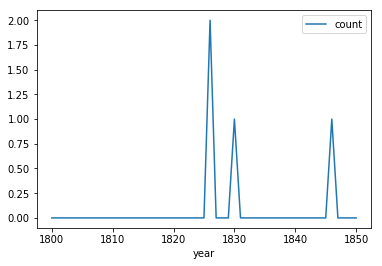

In [4]:
PlotFreq(1800,1850,"tegenwoordige_ramp")

In [32]:
d=PlotFreq(1770,1850,"algemeene_ramp")
df = pd.DataFrame(d,columns=['gram','count','year']).pivot(columns='year',index='gram',values='count').T
#df['year'] = df.index
df = df.reset_index()
df['year'] = df['year'].astype(int)
#df.plot(x="year",y=list(df.columns[1:]),figsize=(20,10))
df

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [62]:
def PlotFreqAny(start_year,end_year,keyword):
    os.chdir('D:/Rampen/ngrams')
    l = sorted(glob.glob('*trigrams.csv'))
    
    df = pd.DataFrame()
    
    for csv in [c for c in l if int(c[0:4]) >= start_year and int(c[0:4]) <= end_year]:
        
        try:
            d = pd.read_csv(csv)
        except ParserError:
            continue
        d = d[d['gram'].str.contains(keyword)]
        d['year'] = csv[0:4] 
        df = df.append(d)
    
    counts = Counter(df['gram'])
    
    df = df[df['gram'].isin([k for k,v in dict(counts).items() if v > 1])]
    return df

d= PlotFreqAny(start_year=1790, end_year=1840,keyword='rampen')

NameError: name 'ParserError' is not defined

,gram,count,year
33268,rampen_van_europa,1,1811
11610,rampen_van_europa,5,1814


In [3]:
masterdic = dict()

for csv in l:
    d = pd.read_csv(csv)
    d = d[d['gram'].str.contains("_ramp")]
    
    dict_year = dict(zip(d['gram'],d['count']))
    dict_year = {k:v for k,v in dict_year.items() if k.split('_')[1] == 'ramp' or k.split('_')[1] == 'rampen'}
    masterdic.update({csv[0:4]:dict_year})

In [4]:
df = pd.DataFrame()

for key in masterdic.keys():
    d = masterdic[key]
    d = pd.DataFrame(list(d.items()),columns=['bigram','count'])
    d['year'] = key
    df = df.append(d)
df = df.pivot(index='bigram', columns='year', values='count')
df['sum'] = df.sum(axis=1)
df.columns = df.columns.get_level_values(0)

In [12]:
adj = []

for x in df.index:
    x=x.split('_')[0]
    for i in split(parse(x)):
         for chunk in i.chunks:
            res = [(w.string, w.type) for w in chunk.words if w.type == "JJ"]
            if len(res) > 0:
                adj.append(res[0][0])

In [16]:
Counter(adj).most_common(5)

[('algemeene', 2), ('algemene', 2), ('baare', 2), ('bare', 2), ('bekende', 2)]

In [19]:
df[df.index.str.split("_").str[0].str.contains('openb')]

year,1750,1751,1752,1753,1754,1755,1756,1757,1758,1759,...,1842,1843,1844,1845,1846,1847,1848,1849,1850,sum
bigram,,,,,,,,,,,,,,,,,,,,,
openbaare_rampen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
openbaie_ramp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
openbare_ramp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
openbare_rampen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0


In [23]:
os.chdir('D:/Rampen/models')


In [24]:
m = KeyedVectors.load('model-1780-1809.w2v')

In [25]:
m.most_similar('rampen')

C:\ProgramData\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('onheilen', 0.857613205909729),
 ('verdeeldheden', 0.749172568321228),
 ('woelingen', 0.7447390556335449),
 ('beroeringen', 0.7261543869972229),
 ('vergetelheid', 0.7147191166877747),
 ('opofferingen', 0.7135350704193115),
 ('yslykheden', 0.7038086652755737),
 ('volken', 0.691841721534729),
 ('gruwelen', 0.6916410326957703),
 ('pogingen', 0.6886123418807983)]